In [174]:
import camelot
import numpy as np
import pandas as pd
import PyPDF2
import tabula
import warnings
warnings.filterwarnings('ignore')

## <font color=blue> The PDF file you want to parse</font>

In [625]:
file = 'data/pdf_data/EXSUM_SPREADSHEET_01_29_19.pdf'

# <font color=orange>PyPDF2</font>

## <font color=blue> How many pages is the document?</font>

In [621]:
pypdf2_doc = PyPDF2.PdfFileReader(file,'rb')
num_pages = pypdf2_doc.getNumPages()
print('This document has {} pages.'.format(num_pages))

This document has 50 pages.


## <font color=blue>Parse the PDF object as a text blob to extract and store certain elements for future use</font>

In [587]:
top = pypdf2_doc.getPage(0).extractText()[0:100]

#### not necessary but handy -- create custom functions for extracting report components like the reporting period or publishing ageny</font>

In [588]:
def get_report_period(text='week ending '):
    """Return period of the report.
    custom helper function for cleaning police incident report."""
    period = top.split(text)[1].split(' ')[0].split('\n')[0]
    return period

def get_report_agency(text='week ending '):
    """Return Department name of issuer of report.
    custom helper function for cleaning police incident report."""
    agency = top.split('week ending ')[0].split('-')[0]
    return agency

## <font color=blue> use the convenience functions</font>

In [589]:
issue_period = get_report_issuer()
issuer = get_report_agency()

print(issuer)
print(issue_period)

Police Department 
1/26/2019


# <font color=orange>camelot</font>

#### not necessary but handy -- create graphical representation of document and document structure to gather information about extraction, and cleaning</font>

In [ ]:
camelot_document = camelot.read_pdf(file, flavor='stream',
                        pages='0-{}'.format(num_pages))

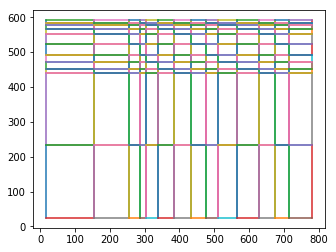

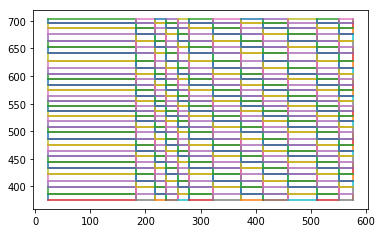

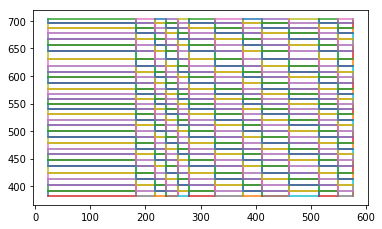

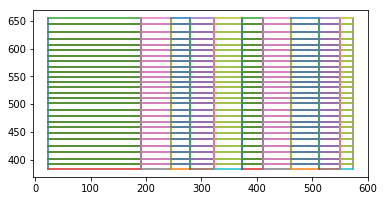

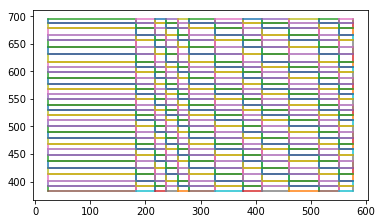

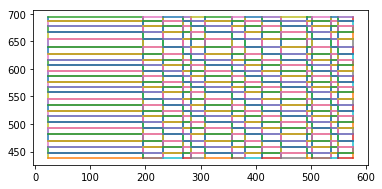

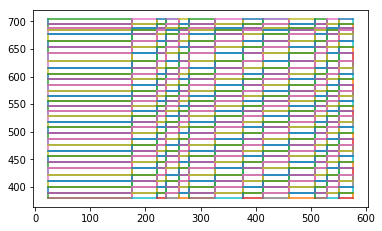

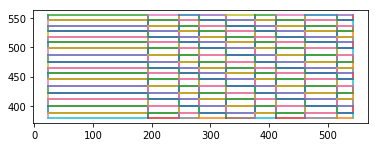

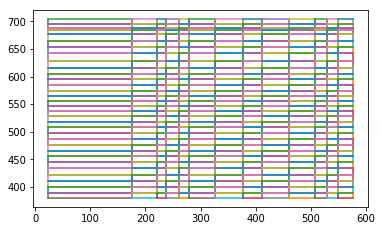

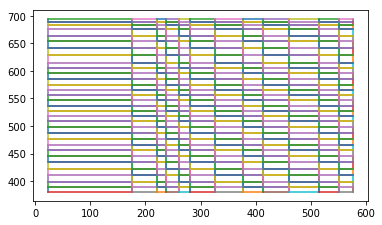

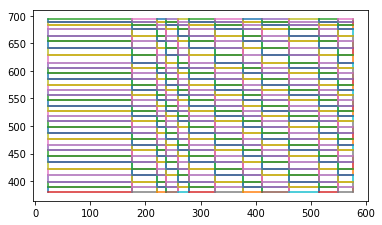

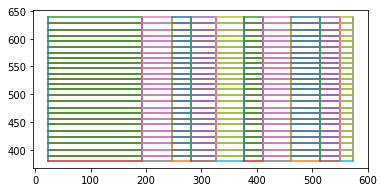

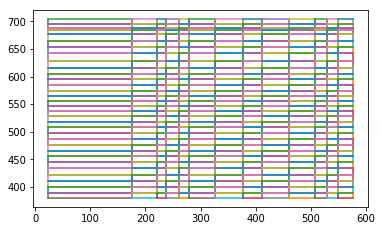

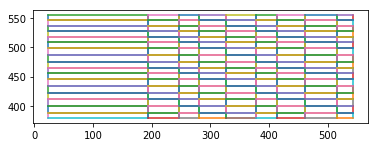

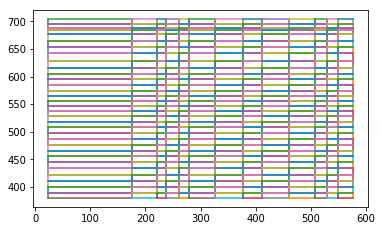

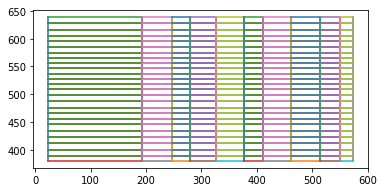

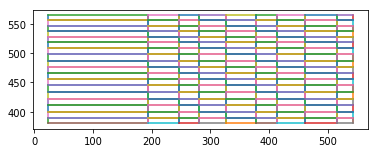

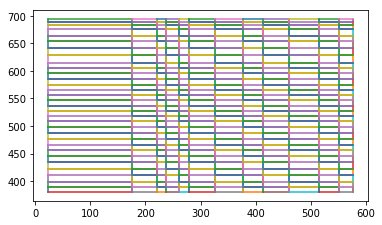

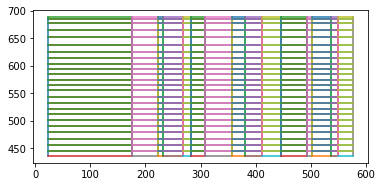

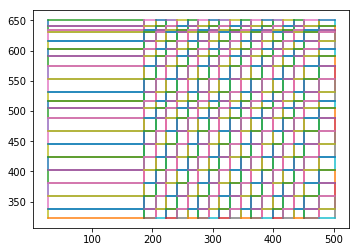

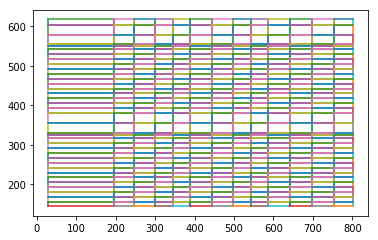

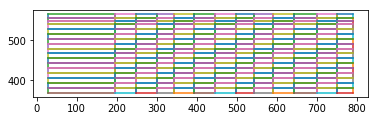

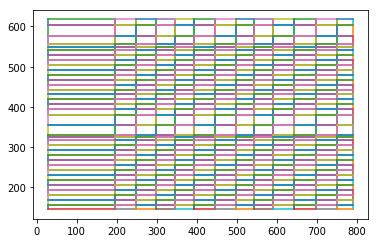

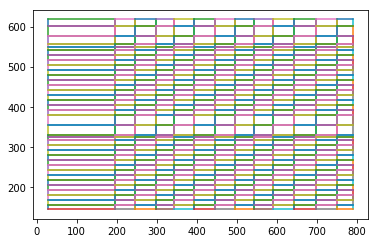

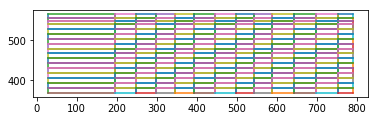

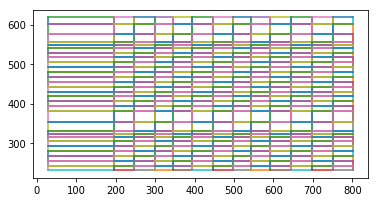

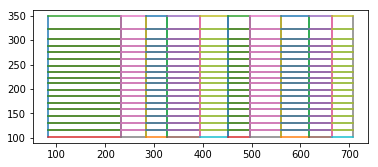

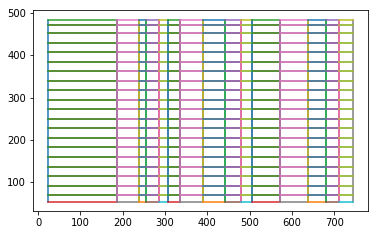

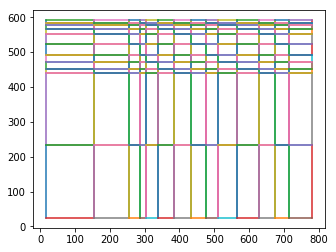

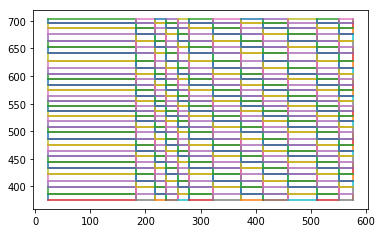

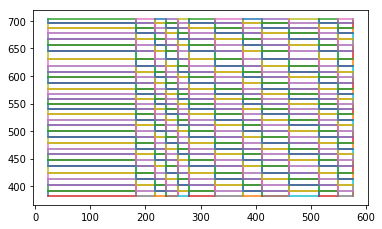

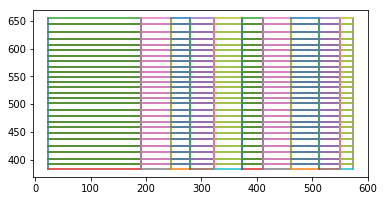

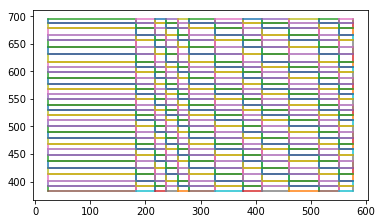

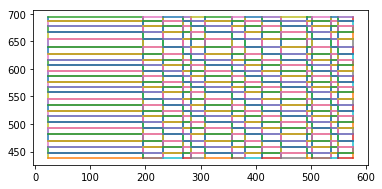

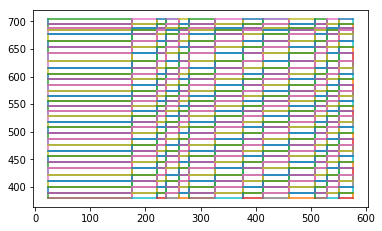

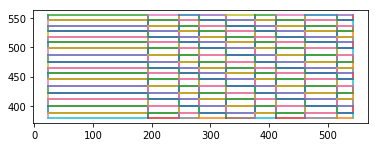

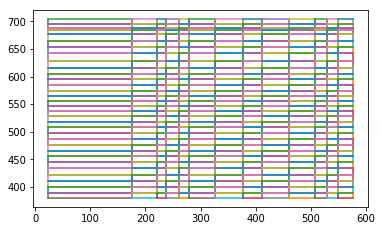

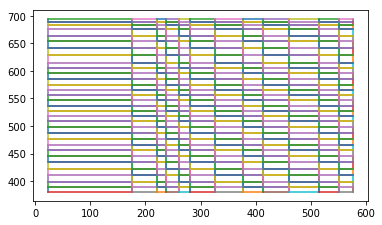

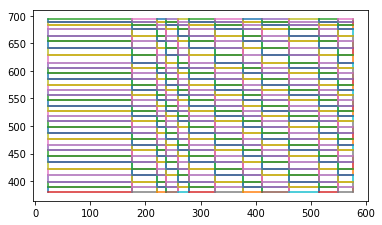

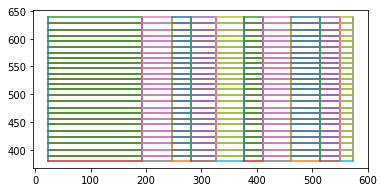

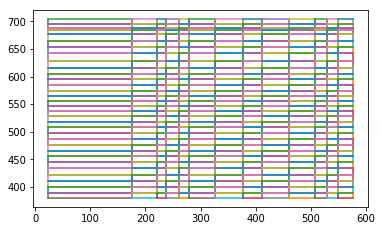

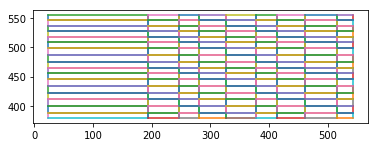

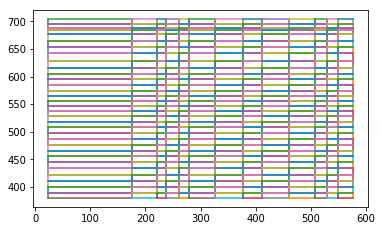

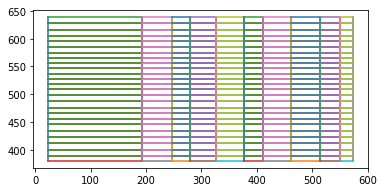

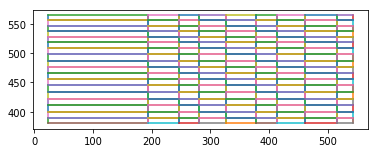

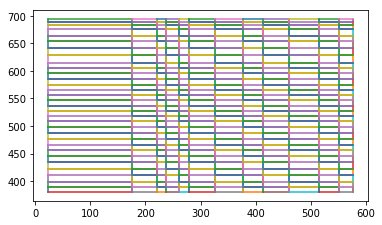

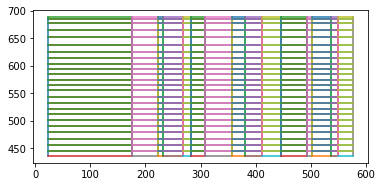

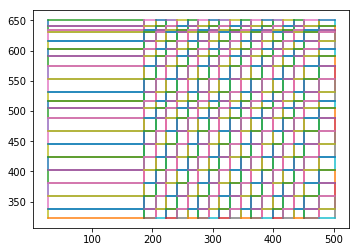

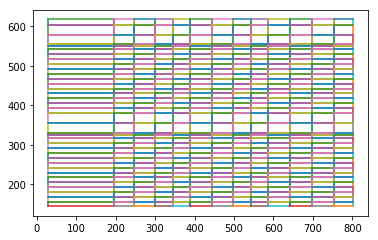

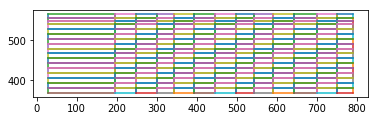

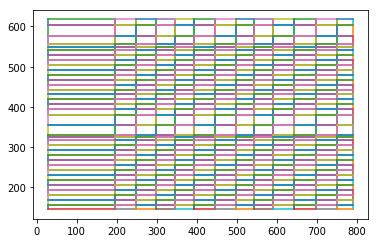

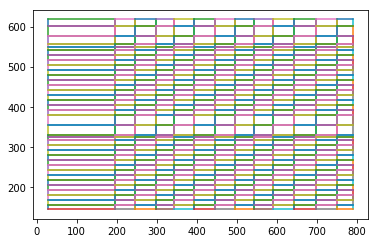

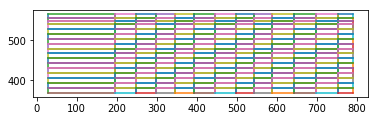

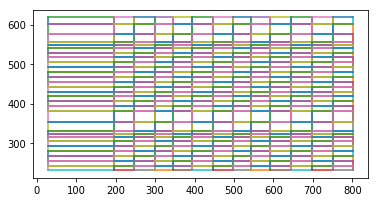

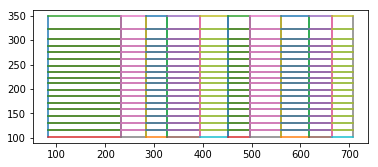

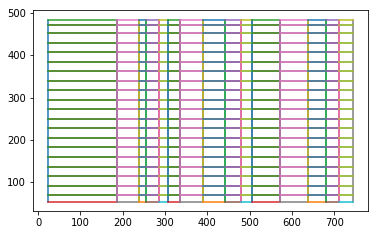

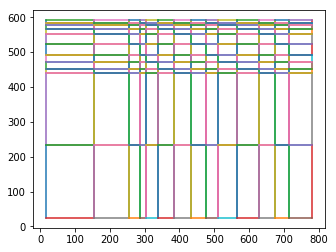

In [623]:
page_plots = {}
for page in range(len(camelot_document)):
    page_plots['page {}'.format(page)] = camelot.plot(camelot_document[page],kind='grid')


page 0


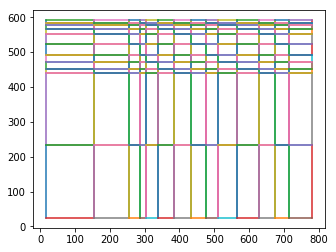

page 1


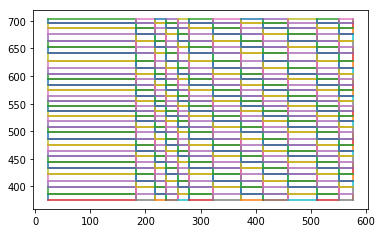

page 2


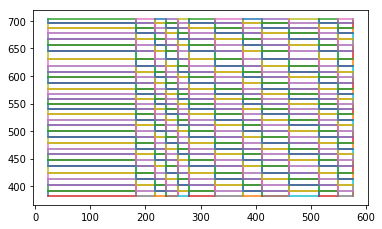

page 3


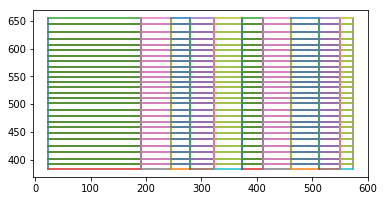

page 4


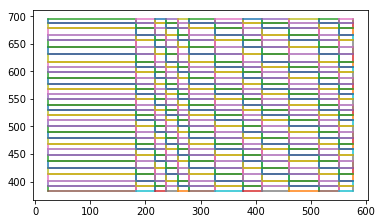

page 5


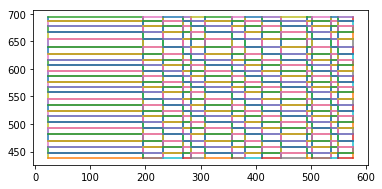

page 6


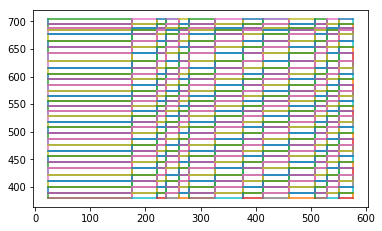

page 7


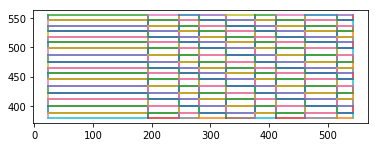

page 8


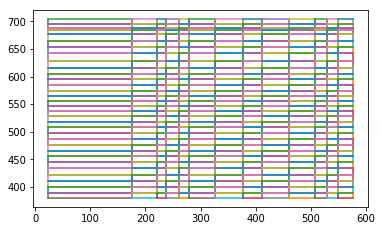

page 9


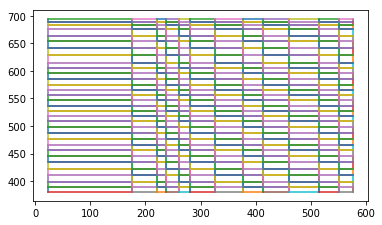

page 10


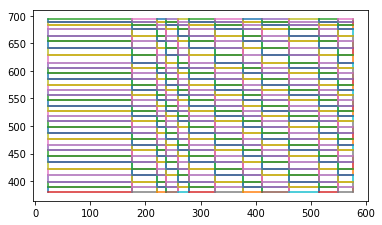

page 11


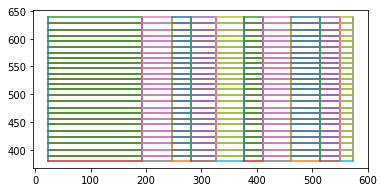

page 12


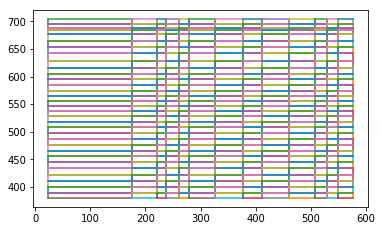

page 13


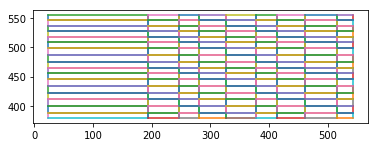

page 14


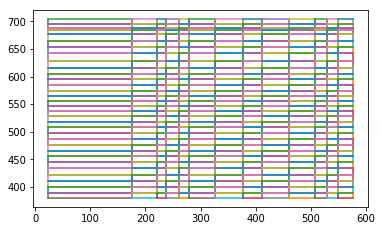

page 15


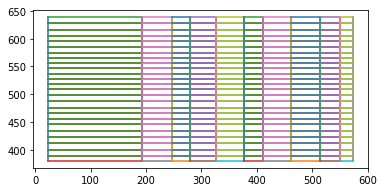

page 16


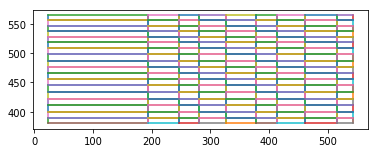

page 17


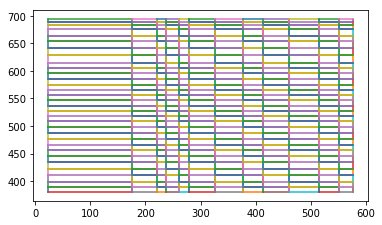

page 18


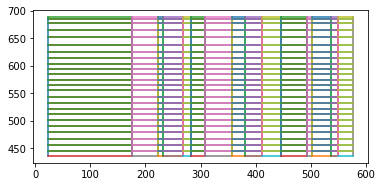

page 19


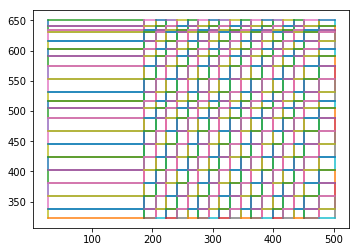

page 20


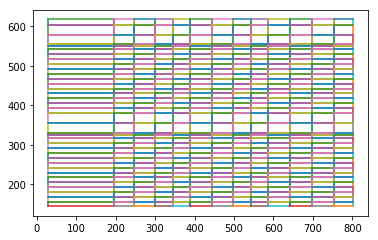

page 21


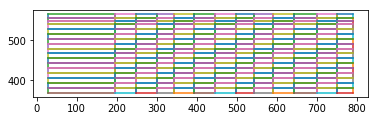

page 22


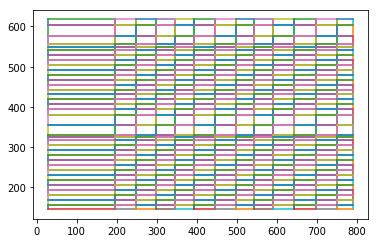

page 23


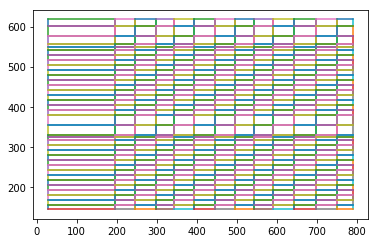

page 24


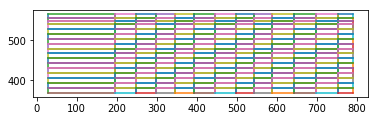

page 25


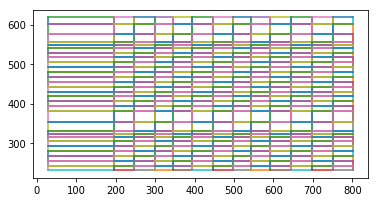

page 26


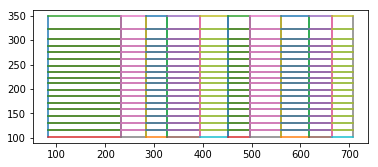

page 27


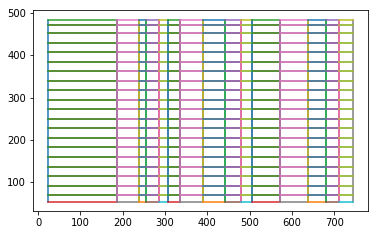

page 28


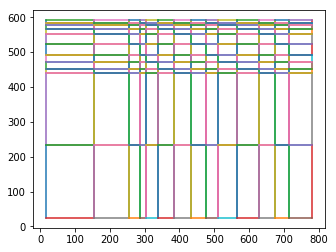

page 29


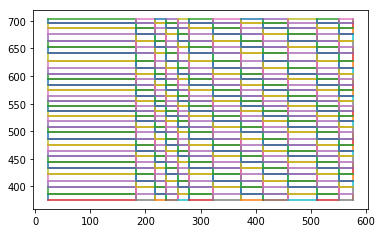

page 30


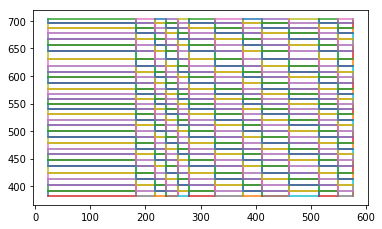

page 31


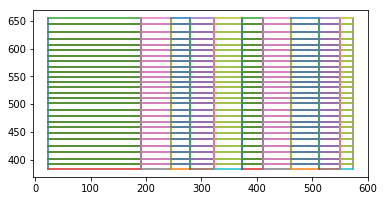

page 32


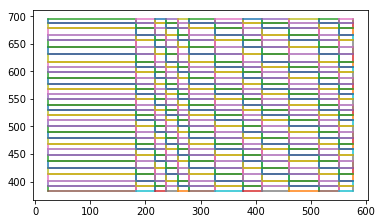

page 33


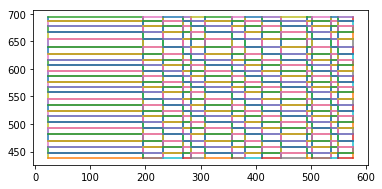

page 34


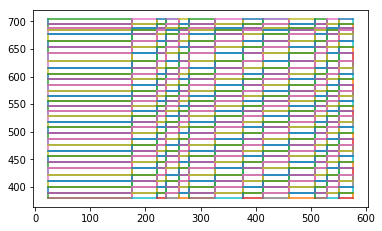

page 35


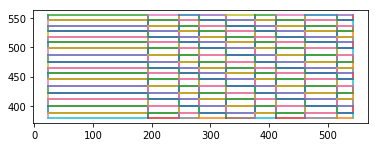

page 36


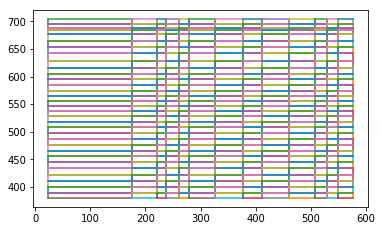

page 37


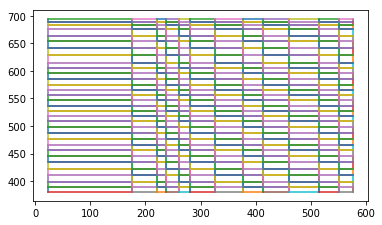

page 38


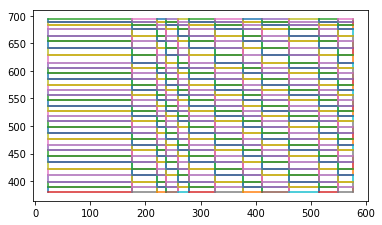

page 39


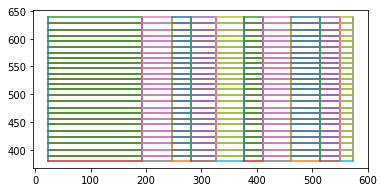

page 40


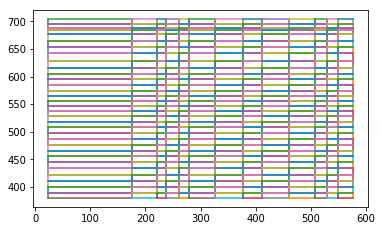

page 41


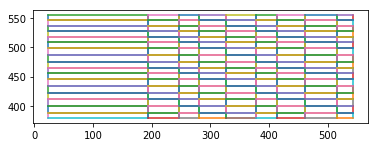

page 42


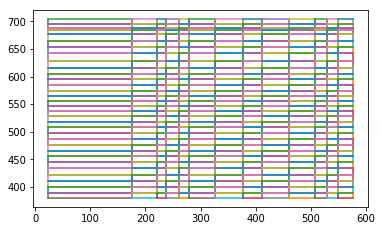

page 43


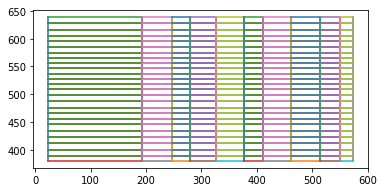

page 44


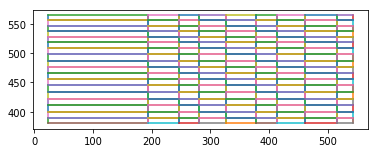

page 45


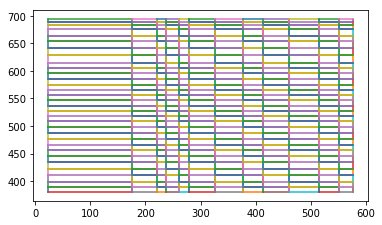

page 46


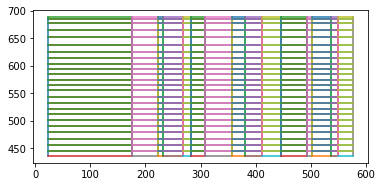

page 47


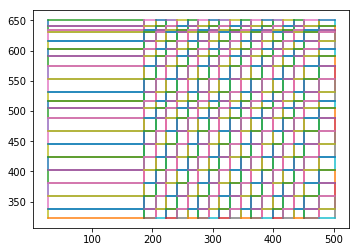

page 48


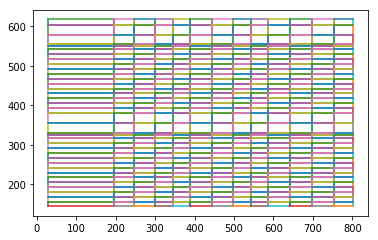

page 49


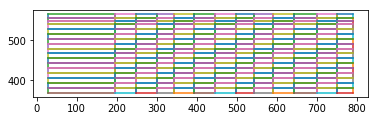

page 50


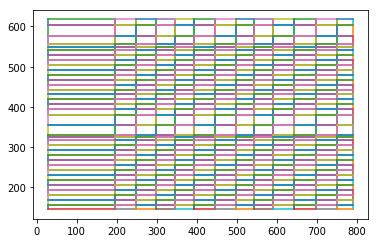

page 51


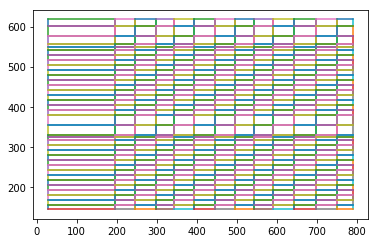

page 52


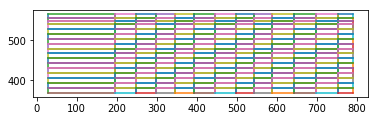

page 53


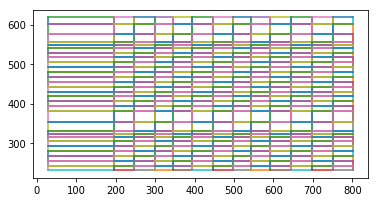

page 54


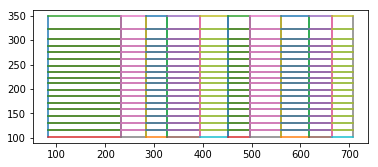

page 55


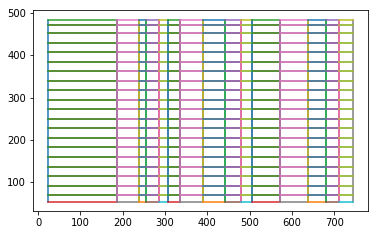

page 56


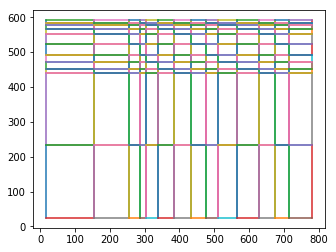

In [624]:
for key,value in page_plots.items():
    print(key)
    display(value)

# <font color=orange>tabula</font>

## <font color=blue>parse the 50 page document with tabula to work with list and dataframe objects instead of text</font>

In [417]:
report = tabula.read_pdf(file,process_background=True, 
                multiple_tables=True,pages='all',
                              pandas_options={
                                  'header':None,
                                  })


['crime',
 '7Day_2019',
 '7Day_2018',
 '7Day_Pct',
 '28Day_2019',
 '28Day_2018',
 '28Day_Pct',
 'YTD_2019',
 'YTD_2018',
 'YTD_Pct']

## <font color=blue>provide more useful column names</font>

In [597]:
new_headers = ['crime','7Day_2019','7Day_2018','7Day_Pct',
       '28Day_2019','28Day_2018','28Day_Pct',
       'YTD_2019','YTD_2018','YTD_Pct']

## <font color=blue>return dataframe for first page</font>

In [583]:
# page one captured in first 4 list items
frames2_concatenate = [] 
[frames2_concatenate.append(report[i]) for i in range(4)]

[None, None, None, None]

In [600]:
page_one = pd.concat(frames2_concatenate)
page_one.columns = new_headers

## <font color=blue>check out the dataframe</font>

In [602]:
page_one.head()

,crime,7Day_2019,7Day_2018,7Day_Pct,28Day_2019,28Day_2018,28Day_Pct,YTD_2019,YTD_2018,YTD_Pct
0,1-HOMICIDE,8,10,-20,29,22,32,25,22,14
1,NON FATAL SHOOTING,13,5,160,50,29,72,46,26,77
2,GUN RELATED (Hom/NFS),20,14,43,76,49,55,68,46,48
0,RAPE (ATTEMPT),0,0,0,1,1,0,1,1,0
1,RAPE (FORCE),0,5,-100,10,25,-60,8,24,-67


## <font color=blue>create a column to capture reporting period</font>

In [604]:
page_one['week_ending'] = pd.to_datetime(issue_period)

## <font color=blue>check out the dataframe</font>

In [605]:
page_one.head()

,crime,7Day_2019,7Day_2018,7Day_Pct,28Day_2019,28Day_2018,28Day_Pct,YTD_2019,YTD_2018,YTD_Pct,week_ending
0,1-HOMICIDE,8,10,-20,29,22,32,25,22,14,2019-01-26
1,NON FATAL SHOOTING,13,5,160,50,29,72,46,26,77,2019-01-26
2,GUN RELATED (Hom/NFS),20,14,43,76,49,55,68,46,48,2019-01-26
0,RAPE (ATTEMPT),0,0,0,1,1,0,1,1,0,2019-01-26
1,RAPE (FORCE),0,5,-100,10,25,-60,8,24,-67,2019-01-26


## <font color=blue>re-index the dataframe, setting the reporting period as the index</font>

In [609]:
page_one.set_index('week_ending', inplace=True)

## <font color=blue> check out the dataframe</font>

In [613]:
page_one.head()

,crime,7Day_2019,7Day_2018,7Day_Pct,28Day_2019,28Day_2018,28Day_Pct,YTD_2019,YTD_2018,YTD_Pct
week_ending,,,,,,,,,,
2019-01-26,1-HOMICIDE,8,10,-20,29,22,32,25,22,14
2019-01-26,NON FATAL SHOOTING,13,5,160,50,29,72,46,26,77
2019-01-26,GUN RELATED (Hom/NFS),20,14,43,76,49,55,68,46,48
2019-01-26,RAPE (ATTEMPT),0,0,0,1,1,0,1,1,0
2019-01-26,RAPE (FORCE),0,5,-100,10,25,-60,8,24,-67


## <font color=blue>save dataframe as excel document</font>

In [617]:
page_one.to_excel('police_page1.xlsx',sheet_name='example')

## <font color=blue> check the file system to see if the file is there</font>

In [619]:
%ls

10-11-2018-brl1906-exploring-pdf-data-scrapers.ipynb
10-13-2018-brl1906-virtualenv-information.ipynb
10-15-2018-brl1906-working-with-camelot.ipynb
10-16-2018-brl1906-working-with-pytesseract.ipynb
10-16-2018-brl1906-working-with-tabula-py.ipynb
10-17-2018-brl1906-working-with-pdf2image.ipynb
10-18-2018-brl1906-working-with-textract.ipynb
10-2018-brl1906-presentation.slides.html
2-4-2019-brl1906-sharkey-elevator-state-pdf-for-who-what-manage.ipynb
2-7-2019-brl1906-baltimore-police-pdf-data-from-justin.ipynb
2-7-2019-brl1906-exploring-pdf-data-scrapers-copy.ipynb
coe_presentation.pptx
data/
images/
outline-talk-thoughts.pptx
page4-10-23-2018.pdf
police_page1.xlsx
presentation.ipynb
readme.md
test-page-1-table-1
update-tabula/
venv_final/


# <font color=red>check out your file</font>

## using background parameter & multiple table parameter

In [389]:
document_list = tabula.read_pdf(file,process_background=True, 
                multiple_tables=True,pages='all')

### returns a list of parsed pages

In [390]:
type(document_list)

list

### each list item is a dataframe object of the page

In [403]:
type(document_list[2])

pandas.core.frame.DataFrame

In [405]:
document_list[0]

,0,1,2,3,4,5,6,7,8,9
0,1-HOMICIDE,8,10,-20,29,22,32,25,22,14
1,NON FATAL SHOOTING,13,5,160,50,29,72,46,26,77
2,GUN RELATED (Hom/NFS),20,14,43,76,49,55,68,46,48


## building a single dataframe per report 

In [414]:
# can list all based on report type & concatenate 
pd.concat([document_list[0], document_list[1],
           document_list[2], document_list[3]]).head()

,0,1,2,3,4,5,6,7,8,9
0,1-HOMICIDE,8,10,-20,29,22,32,25,22,14
1,NON FATAL SHOOTING,13,5,160,50,29,72,46,26,77
2,GUN RELATED (Hom/NFS),20,14,43,76,49,55,68,46,48
0,RAPE (ATTEMPT),0,0,0,1,1,0,1,1,0
1,RAPE (FORCE),0,5,-100,10,25,-60,8,24,-67


## <font color=blue>Determine document length</font>

In [131]:
pdf = tabula.read_pdf(file,pages='all',multiple_tables=True)

In [133]:
type(pdf)

list

In [136]:
len(pdf)

154

In [138]:
pdf[1]

,0,1,2,3,4,5,6,7,8,9
0,RAPE (ATTEMPT),0,0,0,1,1,0,1,1,0
1,RAPE (FORCE),0,5,-100,10,25,-60,8,24,-67
2,2-RAPE,0,5,-100,11,26,-58,9,25,-64
3,ROBBERY - BANK,1,4,-75,4,12,-67,4,12,-67
4,ROBBERY - CARJACKING,7,6,17,39,47,-17,37,46,-20
5,ROBBERY - COMMERCIAL,17,14,21,72,63,14,66,56,18
6,ROBBERY - CONVIENCE STORE,2,2,0,6,11,-45,5,10,-50
7,ROBBERY - GAS STATION,1,0,100,4,1,300,4,1,300
8,ROBBERY - MISC.,3,0,300,8,9,-11,7,9,-22
9,ROBBERY - RESIDENCE,5,7,-29,34,34,0,33,31,6


In [176]:
# using pypdf2
pypdf2_doc = PyPDF2.PdfFileReader(file,'rb')

In [252]:
num_pages = pypdf2_doc.getNumPages()

In [253]:
num_pages

50

## <font color=blue> if there is information in a non tabular section of a standard formatted document, a raw text extraction method can be used to identify and store elements for later use.</font>

In [193]:
pypdf2_doc.getPage(0).extractText()

"Police Department - Baltimore, Maryland\nIncident Report\nData for week ending 1/26/2019\nIncidents w/ UNFOUNDED dispositions ARE NOT include\nd.\n%20192018\n%2018\n2019\n%2018\n2019\n7 - Day28 - Day\nYTD\n07:39\n1/28/2019\nCITYWIDE\n(1/20 - 1/26)\n(1/20 - 1/26) \n(12/30 - 1/26)\n( 12/30 - 1/26)\n(1/01 - 1/26)\n(1/01 - 1/26)\nLotus Notes Data for week ending 1/26/2019\n* * * Based on Lotus Notes Data * * *\n829\n25\n10\n-20\n22\n32\n14\n22\n1-HOMICIDE\n13\n50\n46\n5160\n29\n72\n77\n26\nNON FATAL SHOOTING\nGUN RELATED \n(Hom\n/NFS\n)43\n55\n48\n49\n76\n2014\n6846\n* * * \nBased on RMS Data \n* * *\nRAPE (ATTEMPT)\n10101\n0100RAPE (FORCE)\n10\n08525\n-60\n24\n-67\n-100\n2-RAPE\n011\n95-100\n26\n-58\n-64\n25\nROBBERY - BANK\n414412\n-67\n12\n-67\n-75\nROBBERY - CARJACKING\n39\n737\n647\n-17\n46\n-20\n17\nROBBERY - COMMERCIAL\n72\n17\n66\n1463\n14\n56\n18\n21\nROBBERY - CONVIENCE STORE\n625211\n-45\n10\n-50\n0ROBBERY - GAS STATION\n41401\n300\n1300\n100\nROBBERY - MISC.\n83709\n-11\n9-22\

### store elements for later use

In [242]:
top = pypdf2_doc.getPage(0).extractText()[0:100]
issue_period = get_report_issuer()
issuer = get_report_agency()

print(issuer)
print(issue_period)

## <font color=blue> get  the document again -- differences without the background parameter (less)</font>

In [ ]:
camelot_document = camelot.read_pdf(file, flavor='stream',
                        pages='0-{}'.format(num_pages))

## <font color=blue>.data returns list of items</font>  
### another way to acess report name, timestamp data

In [380]:
camelot_document[0].data

[['',
  '',
  '',
  '',
  '',
  'Police Department - Baltimore, Maryland',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1/28/2019', '', '', '', '', '', '', '', '', '', '', '', '', 'Page 2 of 2'],
 ['',
  '',
  '',
  '',
  '',
  '',
  'Juvenile Custody Report',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '',
  'COMSTAT Arrest Comparison Report',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['', '', '', '', '', '', 'Citywide', '', '', '', '', '', '', ''],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Data for Week ending 1/26/2019',
  ''],
 ['', '', '', '7 - Day', '', '', '', '28 - Day', '', '', '', 'YTD', '', ''],
 ['',
  '2019',
  '2018',
  '',
  '+ / -',
  '%',
  '2019',
  '2018',
  '+ / -',
  '%',
  '2019',
  '2018',
  '+ / -',
  '%'],
 ['',
  '20',
  '',
  '6',
  '14',
  '233.3',
  '90',
  '59',
  '31',
  '52.5',
  '86',
  '59',
  '27',
  '45.8'],
 ['FINAL TOTALS', '', '', '', '', '', '', '', '', '', '', '', '', ''],


## <font color=blue> Examine the document structure to get hints at how to build a cleaning script</font>

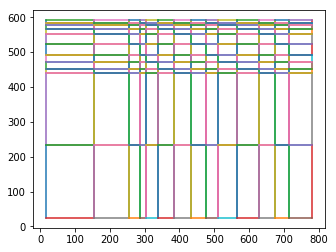

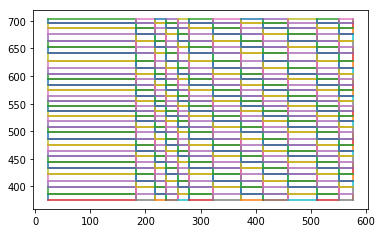

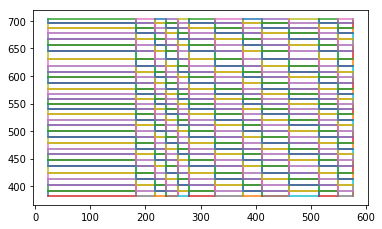

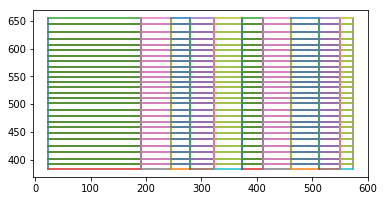

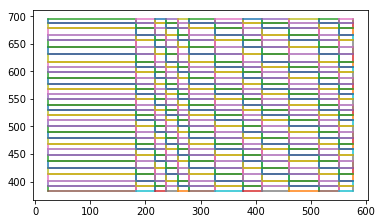

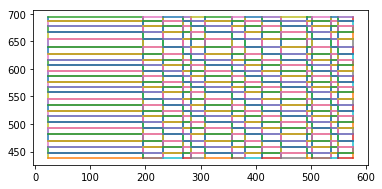

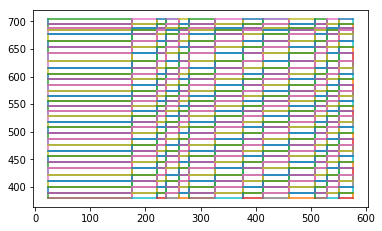

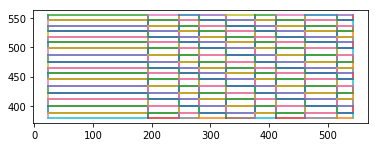

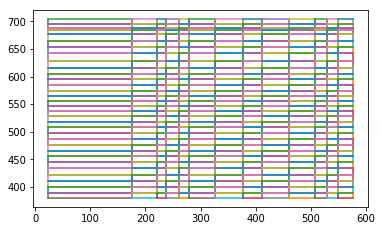

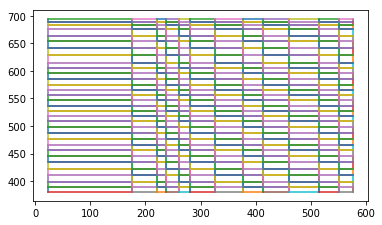

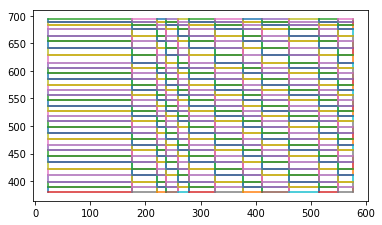

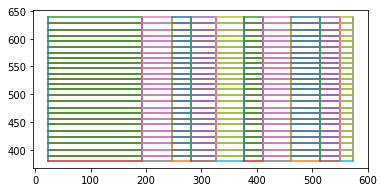

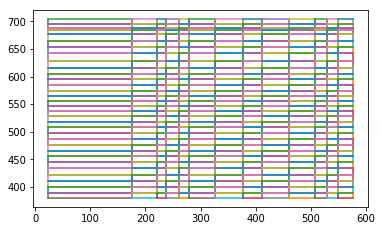

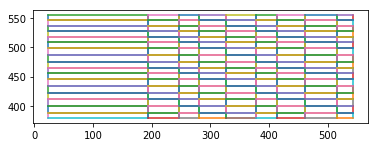

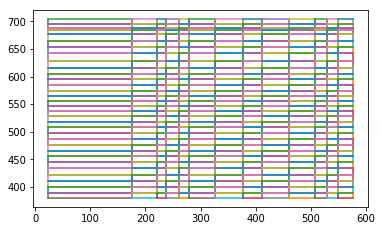

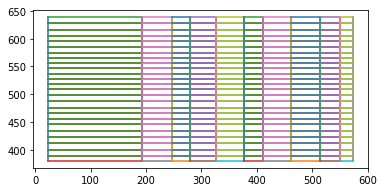

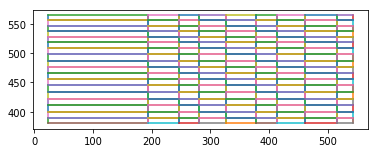

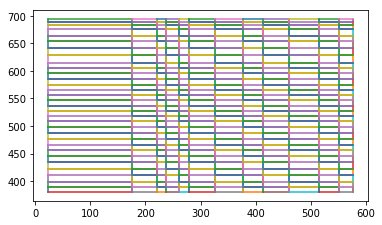

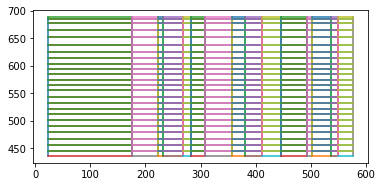

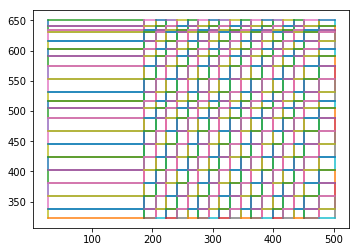

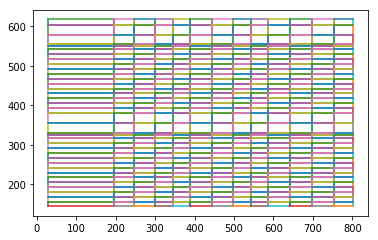

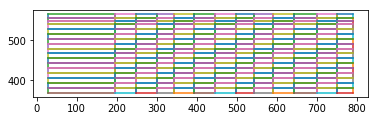

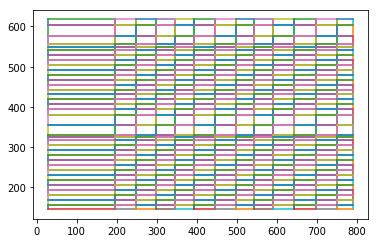

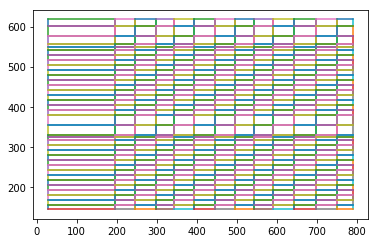

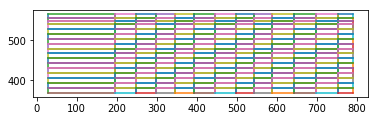

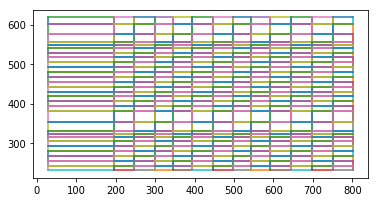

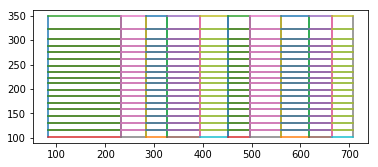

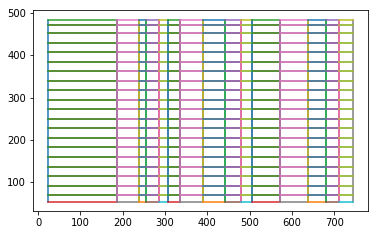

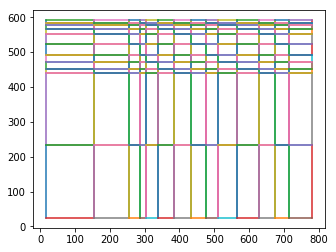

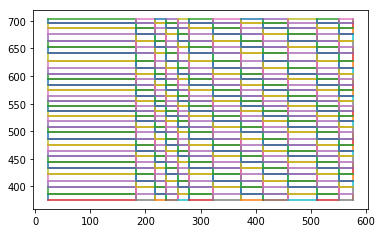

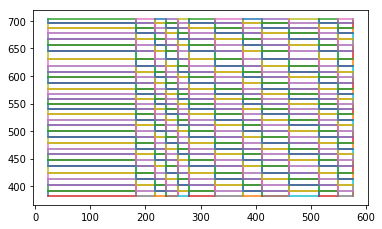

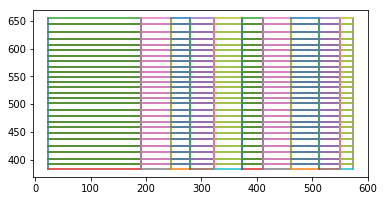

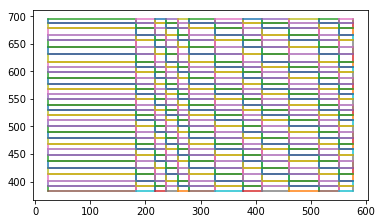

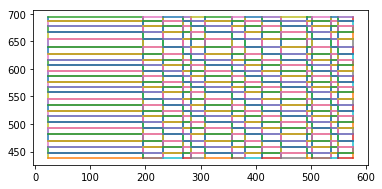

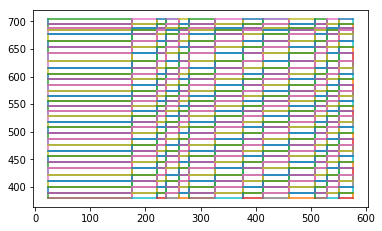

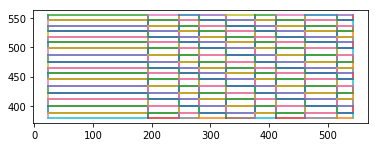

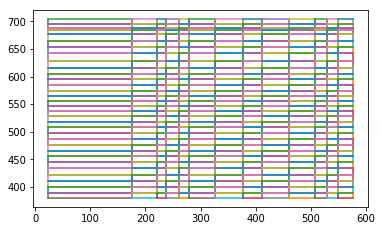

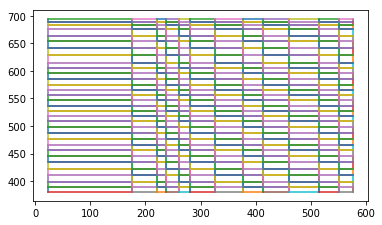

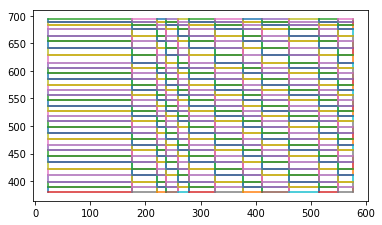

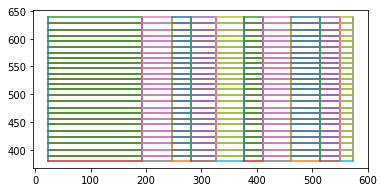

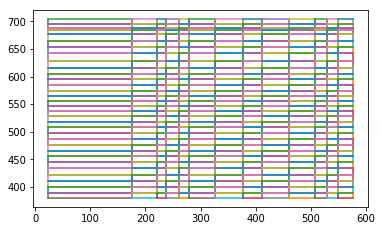

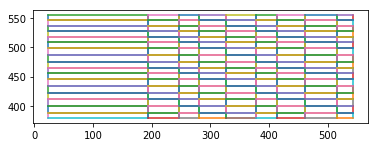

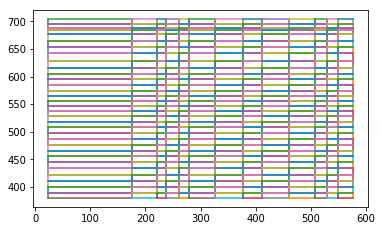

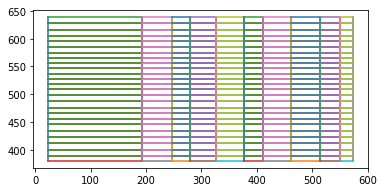

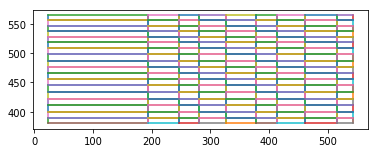

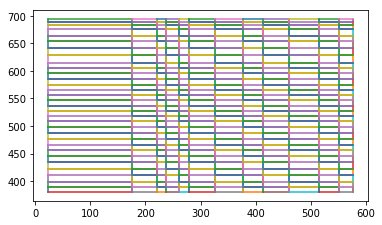

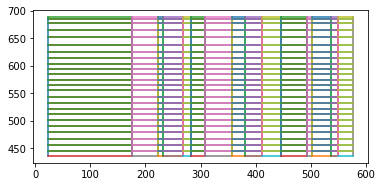

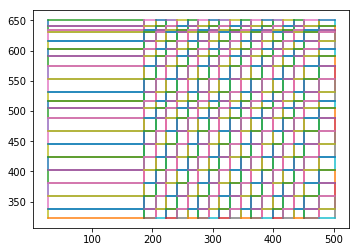

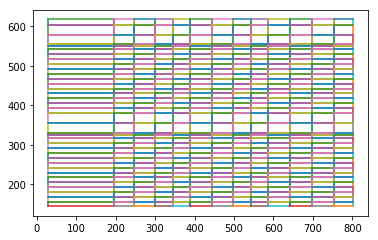

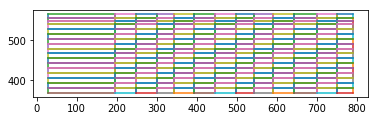

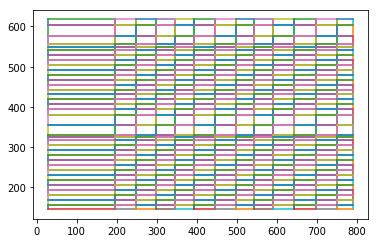

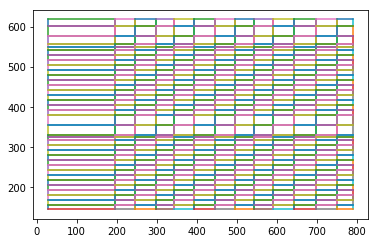

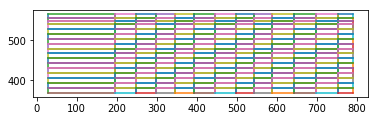

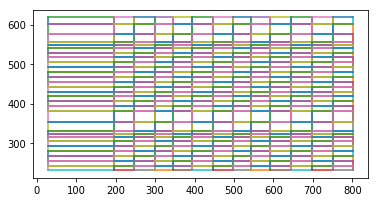

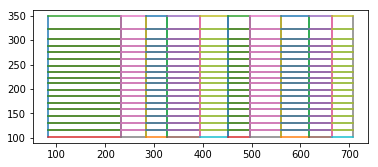

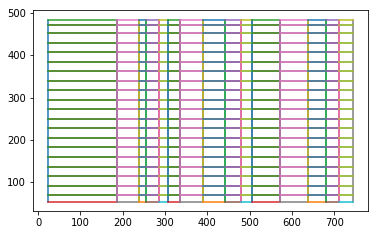

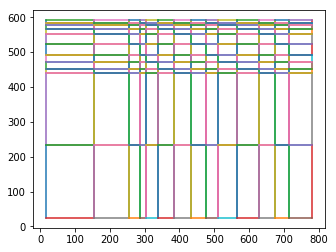

In [316]:
# pack page number & document page plot into dictionary to examine structutre
page_plots = {}
for page in range(len(camelot_document)):
    page_plots['page {}'.format(page)] = camelot.plot(camelot_document[page],kind='grid')


Page: 0


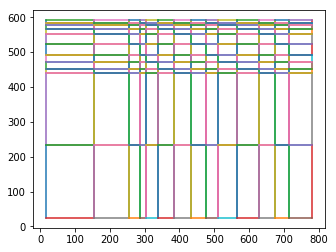

Page: 1


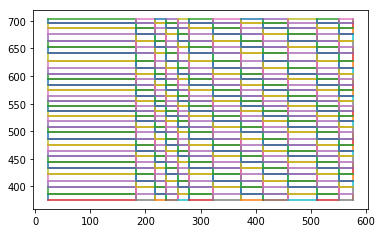

Page: 2


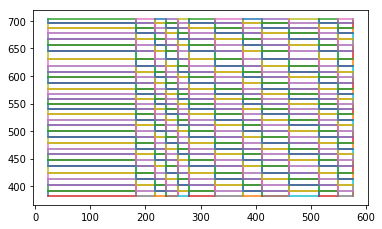

Page: 3


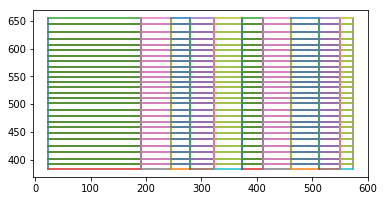

Page: 4


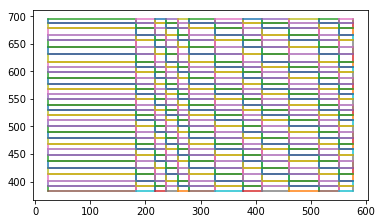

Page: 5


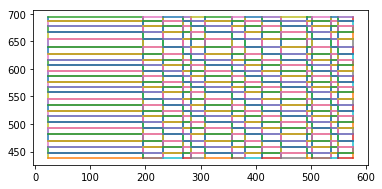

Page: 6


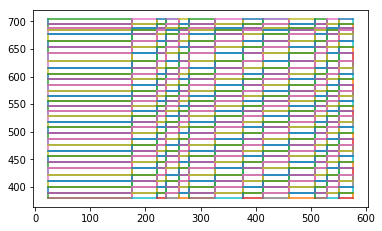

Page: 7


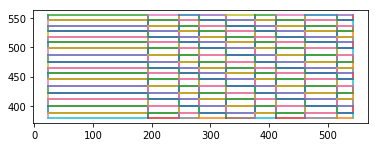

Page: 8


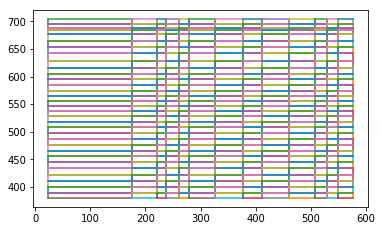

Page: 9


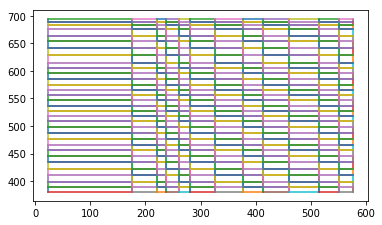

Page: 10


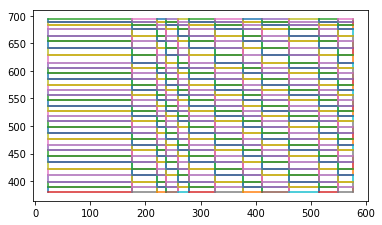

Page: 11


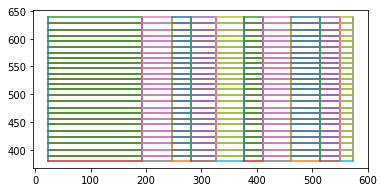

Page: 12


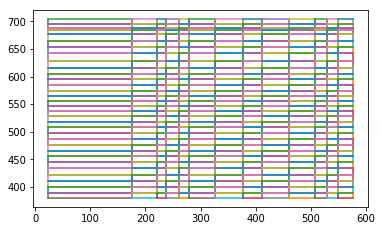

Page: 13


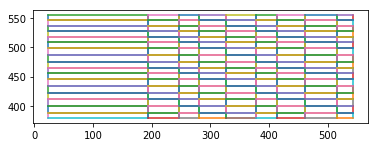

Page: 14


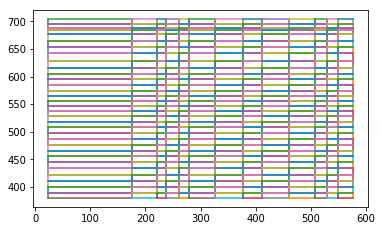

Page: 15


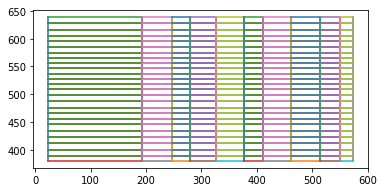

Page: 16


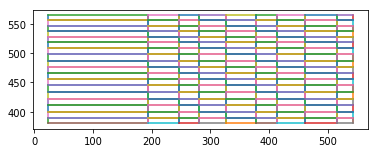

Page: 17


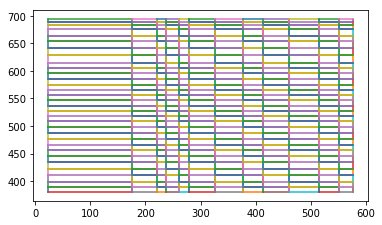

Page: 18


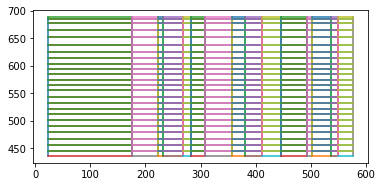

Page: 19


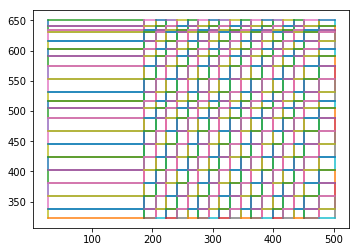

Page: 20


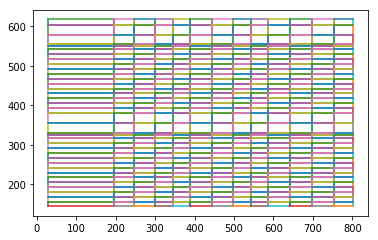

Page: 21


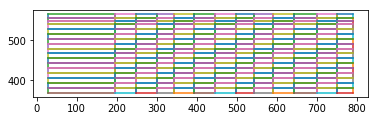

Page: 22


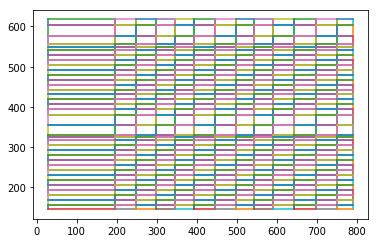

Page: 23


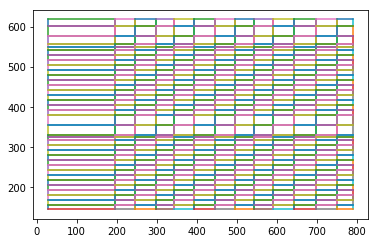

Page: 24


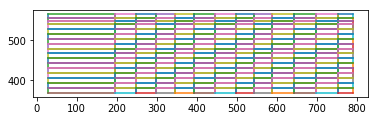

Page: 25


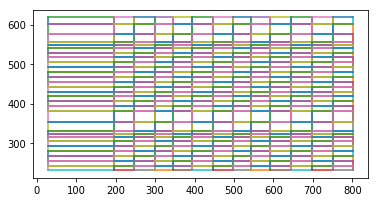

Page: 26


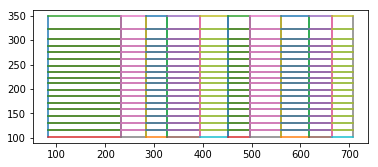

Page: 27


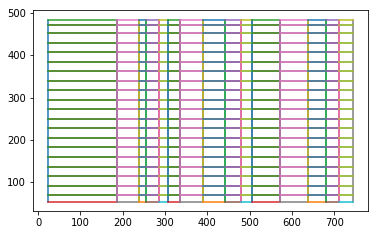

Page: 28


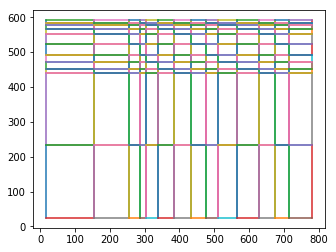

Page: 29


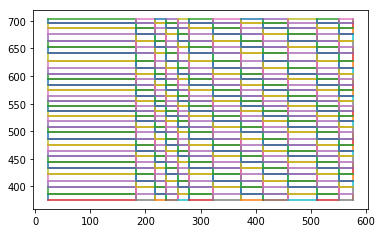

Page: 30


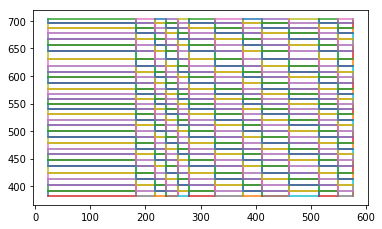

Page: 31


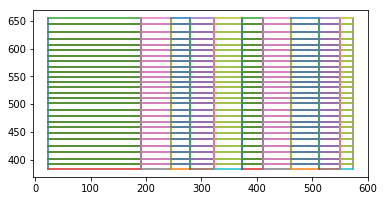

Page: 32


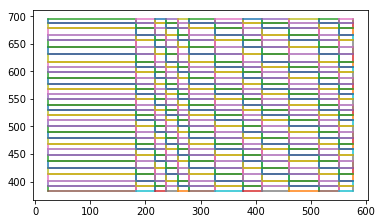

Page: 33


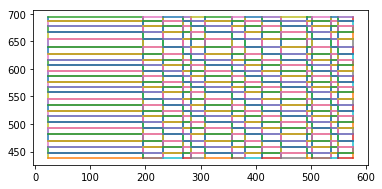

Page: 34


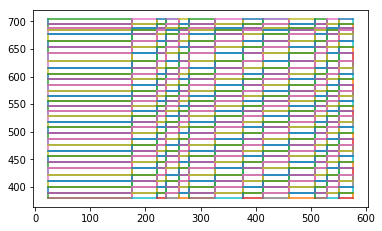

Page: 35


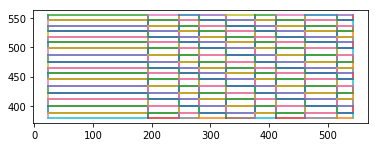

Page: 36


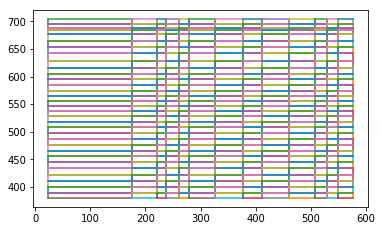

Page: 37


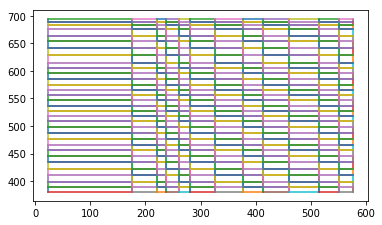

Page: 38


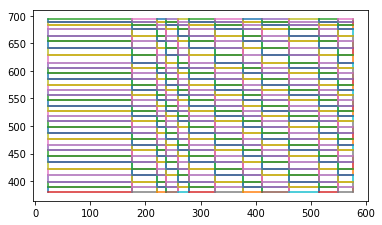

Page: 39


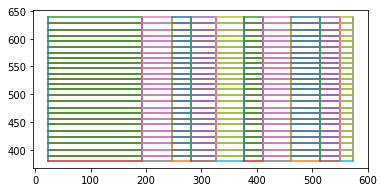

Page: 40


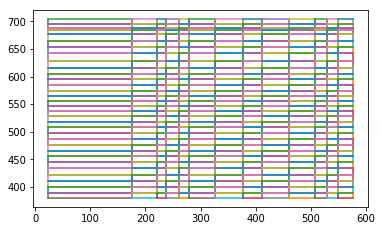

Page: 41


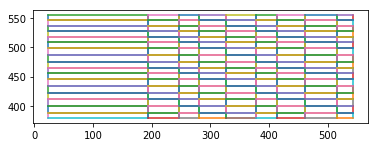

Page: 42


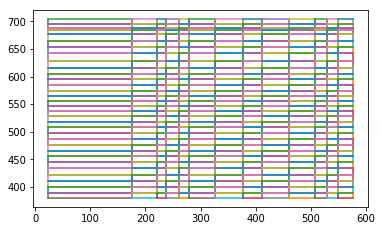

Page: 43


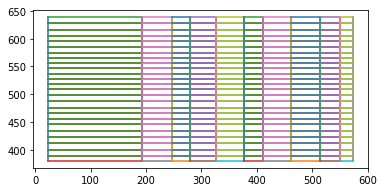

Page: 44


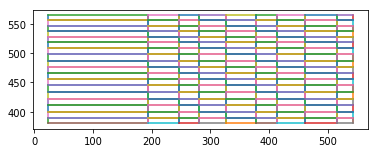

Page: 45


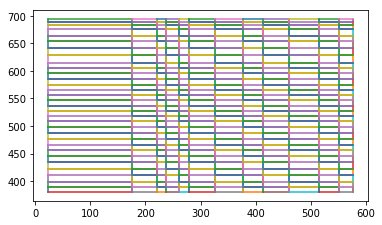

Page: 46


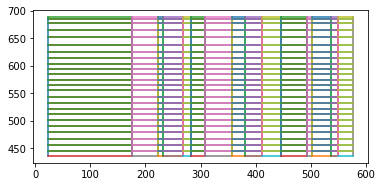

Page: 47


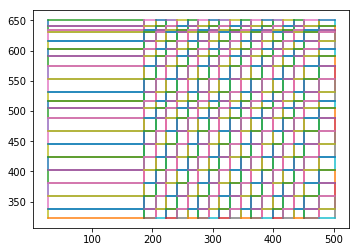

Page: 48


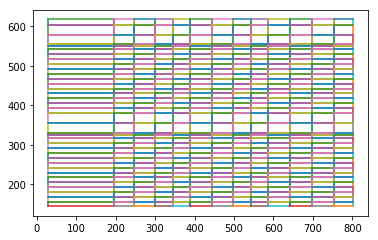

Page: 49


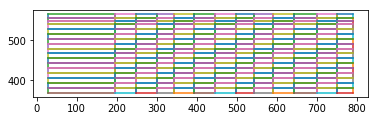

Page: 50


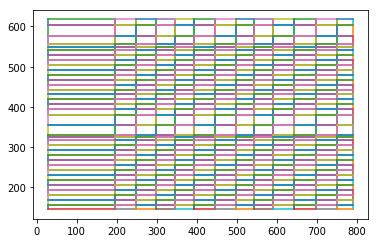

Page: 51


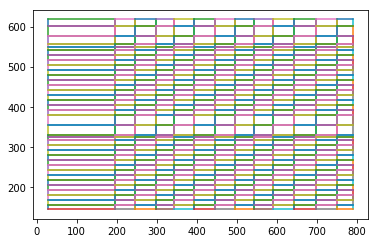

Page: 52


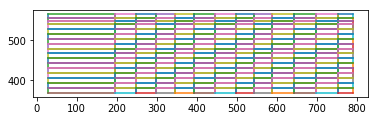

Page: 53


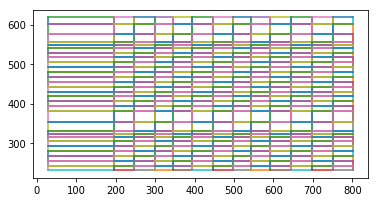

Page: 54


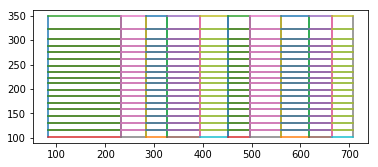

Page: 55


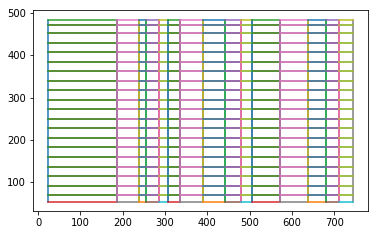

Page: 56


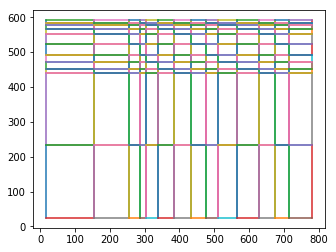

In [318]:
# visualize the structure of each page to identify if breakpoints exist
for key,value in page_plots.items():
    print(key)
    display(value)

### page 19, 20, 29, 47, 48, 54, 55 suggests a break worth investigating against the pdf

In [326]:
camelot_document[18].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,(1/20 - 1/26),,(1/20 - 1/26),,,( 12/30 - 1/26),(12/30 - 1/26),,,(1/01 - 1/26),,(1/01 - 1/26),,
1,UNKNOWN DISTRICT,,,,,,,,,,,,,,
2,* * * Based on Lotus Notes Data * * *,,,,,,,,,,Lotus Notes Data for week ending 1/26/2019,,,,
3,,,0,,0,0,,0,0,0,,0,,0,0
4,GUN RELATED (Hom/NFS),,0,,0,0,,0,0,0,,0,,0,0
5,* * * Based on RMS Data * * *,,,,,,,,,,,,,,
6,RAPE (FORCE),,0,,0,0,,0,0,0,,0,,0,0
7,2-RAPE,,0,,0,0,,0,0,0,,0,,0,0
8,ROBBERY - CARJACKING,,0,,0,0,,0,0,0,,0,,0,0
9,ROBBERY - COMMERCIAL,,0,,0,0,,0,0,0,,0,,0,0


In [324]:
camelot_document[19].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7 - Day (1/20 - 1/26),,,,,,,,,,,,,,,,,
1,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,
2,Workflow Summary - Pending Rpts.,,,,,,,,,,,,,,,,,Total
3,,1,,2,,3,,4,,5,,6,,8,,9,,
4,PART I \n2-RAPE\n2A,,0,,0,,1,,0,,1,,0,,0,,0,2
5,OFFENSES,,,,,,,,,,,,,,,,,
6,Total,,0,,0,,1,,0,,1,,0,,0,,0,2
7,3-ROBBERY\n3N,,0,,0,,0,,1,,0,,0,,0,,0,1
8,Total,,0,,0,,0,,1,,0,,0,,0,,0,1
9,4-AGGRAVATED \n4A,,1,,0,,0,,0,,1,,0,,0,,0,2


In [335]:
camelot_document[20].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,Baltimore Police Department,,,,,,,,
1,,,,"Arrests 7 day, 28 day and Year to Date",,,,,,,,,
2,,1/20/2018,1/20/2019,7,7,12/30/2017,12/30/2018,28,28,1/1/2018,1/1/2019,YTD,YTD
3,CITYWIDE,,,,,,,,,,,,
4,,thru,thru,Day,Day,thru,thru,Day,Day,thru,thru,CITYWIDE,CITYWIDE
5,,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%
6,,----------------------------------------------...,,,,,,,,,,,
7,HOMICIDE,2,1,-1,-50,9,6,-3,-33,9,6,-3,-33
8,RAPE,0,3,3,0,3,7,4,133,2,7,5,250
9,ROBBERY,25,15,-10,-40,56,46,-10,-18,54,44,-10,-19


In [341]:
camelot_document[25].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,Baltimore Police Department,,,,,,,,
1,,,,"Arrests 7 day, 28 day and Year to Date",,,,,,,,,
2,,1/20/2018,1/20/2019,7,7,12/30/2017,12/30/2018,28,28,1/1/2018,1/1/2019,YTD,YTD
3,SOUTHERN DISTRICT,,,,,,,,,,,,
4,,thru,thru,Day,Day,thru,thru,Day,Day,thru,thru,SD,SD
5,,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%
6,,----------------------------------------------...,,,,,,,,,,,
7,HOMICIDE,0,0,0,0,0,0,0,0,0,0,0,0
8,RAPE,0,0,0,0,1,0,-1,-100,0,0,0,0
9,ROBBERY,1,0,-1,-100,3,4,1,33,3,4,1,33


In [340]:
camelot_document[26].df # page 23

,0,1,2,3,4,5,6,7,8,9
0,,,COMSTAT PERIOD ‐ ENDING 01/26/2019,,,,,,,
1,,7‐Day Crime ‐ (01/20 ‐ 01/26),,,,28‐Day Crime ‐ (12/30 ‐ 01/26),,,YTD Crime ‐ (01/01/18 ‐ 01/26),
2,,2019,2018,%,2019,2018,%,2019,2018,%
3,Homicide,8,10,‐20%,29,22,32%,25,22,14%
4,Non Fatal Shootings,13,5,160%,50,29,72%,46,26,77%
5,Rape,0,5,‐100%,11,26,‐58%,9,25,‐64%
6,Robbery (Total),84,106,‐21%,400,435,‐8%,376,418,‐10%
7,Robbery (Commercial),21,20,5%,86,87,‐1%,79,79,0%
8,"Robbery (Street, Resid., Carjack)",63,86,‐27%,314,348,‐10%,297,339,‐12%
9,Aggravated Assault,73,96,‐24%,349,332,5%,326,309,6%


In [339]:
camelot_document[27].df  # page 24

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,7 - Day,,,,28 - Day,,,,YTD,,
1,,2019,,2018,,+ / -,%,2019,2018,+ / -,%,2019,2018,+ / -,%
2,02-Rape,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0
3,03-Robbery,,12,,0,,"12 1,200.0",28,6,22,366.7,28,6,22,366.7
4,04-Aggravated Assault,,3,,0,3,300.0,10,2,8,400.0,10,2,8,400.0
5,05-Burglary,,0,,2,-2,-100.0,3,5,-2,-40.0,2,5,-3,-60.0
6,06-Larceny,,1,,0,1,100.0,8,1,7,700.0,8,1,7,700.0
7,07-Stolen Auto,,1,,0,1,100.0,6,14,-8,-57.1,6,14,-8,-57.1
8,09-Arson,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0
9,10-Forgery And Counterfeiting,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0


In [343]:
camelot_document[28].df # page 25

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,"Police Department - Baltimore, Maryland",,,,,,,,
1,1/28/2019,,,,,,,,,,,,,Page 2 of 2
2,,,,,,,Juvenile Custody Report,,,,,,,
3,,,,,,COMSTAT Arrest Comparison Report,,,,,,,,
4,,,,,,,Citywide,,,,,,,
5,,,,,,,,,,,,,Data for Week ending 1/26/2019,
6,,,,7 - Day,,,,28 - Day,,,,YTD,,
7,,2019,2018,,+ / -,%,2019,2018,+ / -,%,2019,2018,+ / -,%
8,,20,,6,14,233.3,90,59,31,52.5,86,59,27,45.8
9,FINAL TOTALS,,,,,,,,,,,,,


In [346]:
camelot_document[29].df # page 26 -- back to page 1 format

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,,7 - Day,,,,28 - Day,,,YTD,
1,,2019,,2018,,%,2019,2018,%,2019,2018,%
2,,(1/20 - 1/26),,(1/20 - 1/26),,,( 12/30 - 1/26),(12/30 - 1/26),,(1/01 - 1/26),(1/01 - 1/26),
3,* * * Based on Lotus Notes Data * * *,,,,,,,,,Lotus Notes Data for week ending 1/26/2019,,
4,1-HOMICIDE,,8,,10,-20,29,22,32,25,22,14
5,NON FATAL SHOOTING,,13,,5,160,50,29,72,46,26,77
6,GUN RELATED (Hom/NFS),,20,,14,43,76,49,55,68,46,48
7,* * * Based on RMS Data * * *,,,,,,,,,,,
8,RAPE (ATTEMPT),,0,,0,0,1,1,0,1,1,0
9,RAPE (FORCE),,0,,5,-100,10,25,-60,8,24,-67


In [349]:
camelot_document[47].df # page 41 -- back to page 16 report format

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7 - Day (1/20 - 1/26),,,,,,,,,,,,,,,,,
1,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,Dist. #,,
2,Workflow Summary - Pending Rpts.,,,,,,,,,,,,,,,,,Total
3,,1,,2,,3,,4,,5,,6,,8,,9,,
4,PART I \n2-RAPE\n2A,,0,,0,,1,,0,,1,,0,,0,,0,2
5,OFFENSES,,,,,,,,,,,,,,,,,
6,Total,,0,,0,,1,,0,,1,,0,,0,,0,2
7,3-ROBBERY\n3N,,0,,0,,0,,1,,0,,0,,0,,0,1
8,Total,,0,,0,,0,,1,,0,,0,,0,,0,1
9,4-AGGRAVATED \n4A,,1,,0,,0,,0,,1,,0,,0,,0,2


In [350]:
camelot_document[48].df # page 42 back to district level report

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,Baltimore Police Department,,,,,,,,
1,,,,"Arrests 7 day, 28 day and Year to Date",,,,,,,,,
2,,1/20/2018,1/20/2019,7,7,12/30/2017,12/30/2018,28,28,1/1/2018,1/1/2019,YTD,YTD
3,CITYWIDE,,,,,,,,,,,,
4,,thru,thru,Day,Day,thru,thru,Day,Day,thru,thru,CITYWIDE,CITYWIDE
5,,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%
6,,----------------------------------------------...,,,,,,,,,,,
7,HOMICIDE,2,1,-1,-50,9,6,-3,-33,9,6,-3,-33
8,RAPE,0,3,3,0,3,7,4,133,2,7,5,250
9,ROBBERY,25,15,-10,-40,56,46,-10,-18,54,44,-10,-19


In [356]:
camelot_document[53].df # page 47 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,Baltimore Police Department,,,,,,,,
1,,,,"Arrests 7 day, 28 day and Year to Date",,,,,,,,,
2,,1/20/2018,1/20/2019,7,7,12/30/2017,12/30/2018,28,28,1/1/2018,1/1/2019,YTD,YTD
3,SOUTHERN DISTRICT,,,,,,,,,,,,
4,,thru,thru,Day,Day,thru,thru,Day,Day,thru,thru,SD,SD
5,,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%,1/26/2018,1/26/2019,+ / -,%
6,,----------------------------------------------...,,,,,,,,,,,
7,HOMICIDE,0,0,0,0,0,0,0,0,0,0,0,0
8,RAPE,0,0,0,0,1,0,-1,-100,0,0,0,0
9,ROBBERY,1,0,-1,-100,3,4,1,33,3,4,1,33


In [357]:
camelot_document[54].df

,0,1,2,3,4,5,6,7,8,9
0,,,COMSTAT PERIOD ‐ ENDING 01/26/2019,,,,,,,
1,,7‐Day Crime ‐ (01/20 ‐ 01/26),,,,28‐Day Crime ‐ (12/30 ‐ 01/26),,,YTD Crime ‐ (01/01/18 ‐ 01/26),
2,,2019,2018,%,2019,2018,%,2019,2018,%
3,Homicide,8,10,‐20%,29,22,32%,25,22,14%
4,Non Fatal Shootings,13,5,160%,50,29,72%,46,26,77%
5,Rape,0,5,‐100%,11,26,‐58%,9,25,‐64%
6,Robbery (Total),84,106,‐21%,400,435,‐8%,376,418,‐10%
7,Robbery (Commercial),21,20,5%,86,87,‐1%,79,79,0%
8,"Robbery (Street, Resid., Carjack)",63,86,‐27%,314,348,‐10%,297,339,‐12%
9,Aggravated Assault,73,96,‐24%,349,332,5%,326,309,6%


In [359]:
camelot_document[55].df # page 49

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,7 - Day,,,,28 - Day,,,,YTD,,
1,,2019,,2018,,+ / -,%,2019,2018,+ / -,%,2019,2018,+ / -,%
2,02-Rape,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0
3,03-Robbery,,12,,0,,"12 1,200.0",28,6,22,366.7,28,6,22,366.7
4,04-Aggravated Assault,,3,,0,3,300.0,10,2,8,400.0,10,2,8,400.0
5,05-Burglary,,0,,2,-2,-100.0,3,5,-2,-40.0,2,5,-3,-60.0
6,06-Larceny,,1,,0,1,100.0,8,1,7,700.0,8,1,7,700.0
7,07-Stolen Auto,,1,,0,1,100.0,6,14,-8,-57.1,6,14,-8,-57.1
8,09-Arson,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0
9,10-Forgery And Counterfeiting,,0,,0,0,0.0,0,0,0,0.0,0,0,0,0.0
